In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img_size = 256
path = ("drive/My Drive/dataset/concrete-wall-royalty-free-image-1572896179.jpg")
img_to_predict = path

In [0]:
def prepare_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    return img.reshape(-1, img_size, img_size, 1)

In [0]:
model = tf.keras.models.load_model("drive/My Drive/dataset/Concrete_Crack_Classification_model2.model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
prediction = model.predict([prepare_image(img_to_predict)])

In [0]:
if prediction[0][0] <= .5:
    pred_text = "Networks prediction: crack Confidence: {:.2f}%".format((1 - prediction[0][0]) * 100)
elif prediction[0][0] > .5:
    pred_text = "Networks prediction: no crack Confidence: {:.2f}%".format((1 - prediction[0][0]) * 100)
else:
    print("\nSomething went wrong...")

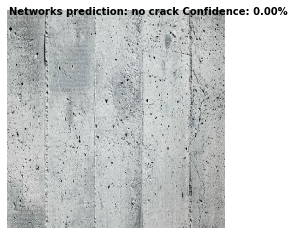

In [0]:
plt.imshow(cv2.resize(cv2.imread(img_to_predict), (img_size, img_size)))
plt.axis('off')
plt.text(2, 5, pred_text, fontweight = "bold")
plt.show()